# Perrin_Freres_Sales_Forecasting

Dataset: https://www.kaggle.com/galibce003/perrin-freres-monthly-champagne-sales

In [43]:
#importing libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing data, renaming column.
df=pd.read_csv('Perrin Freres monthly champagne sales millions.csv',parse_dates=True)
df.rename(columns={'Perrin Freres monthly champagne sales millions ?64-?72':'sales'},inplace=True)
df.head()

,Month,sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [3]:
#identifying null values.
df.isna().sum()

Month    1
sales    2
dtype: int64

- Data is having very minimal null values.   
- Rows could be dropped where null values are present.

In [4]:
#Dropping null values.
df.dropna(inplace=True)
df.isna().sum()

Month    0
sales    0
dtype: int64

- Converting month coulmn data type to datetime 

In [5]:
#Resetting index to month column.
df.Month=pd.to_datetime(df.Month)
df=df.set_index('Month')
df.head()

,sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


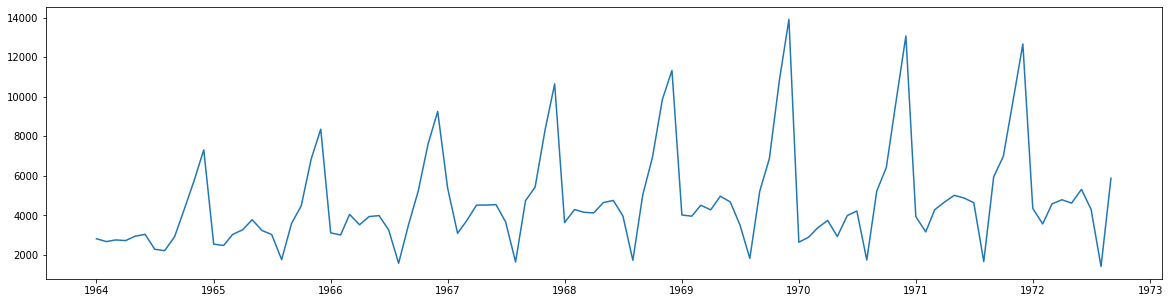

In [258]:
#Plotting sales column.
plt.figure(figsize=(20,5))
plt.plot(df.sales)

- By looking at the plot we can observe that there is Trend and Seasonality in the data.

- Trend, Seasonality and random data could be plotted using seasonal decompose.

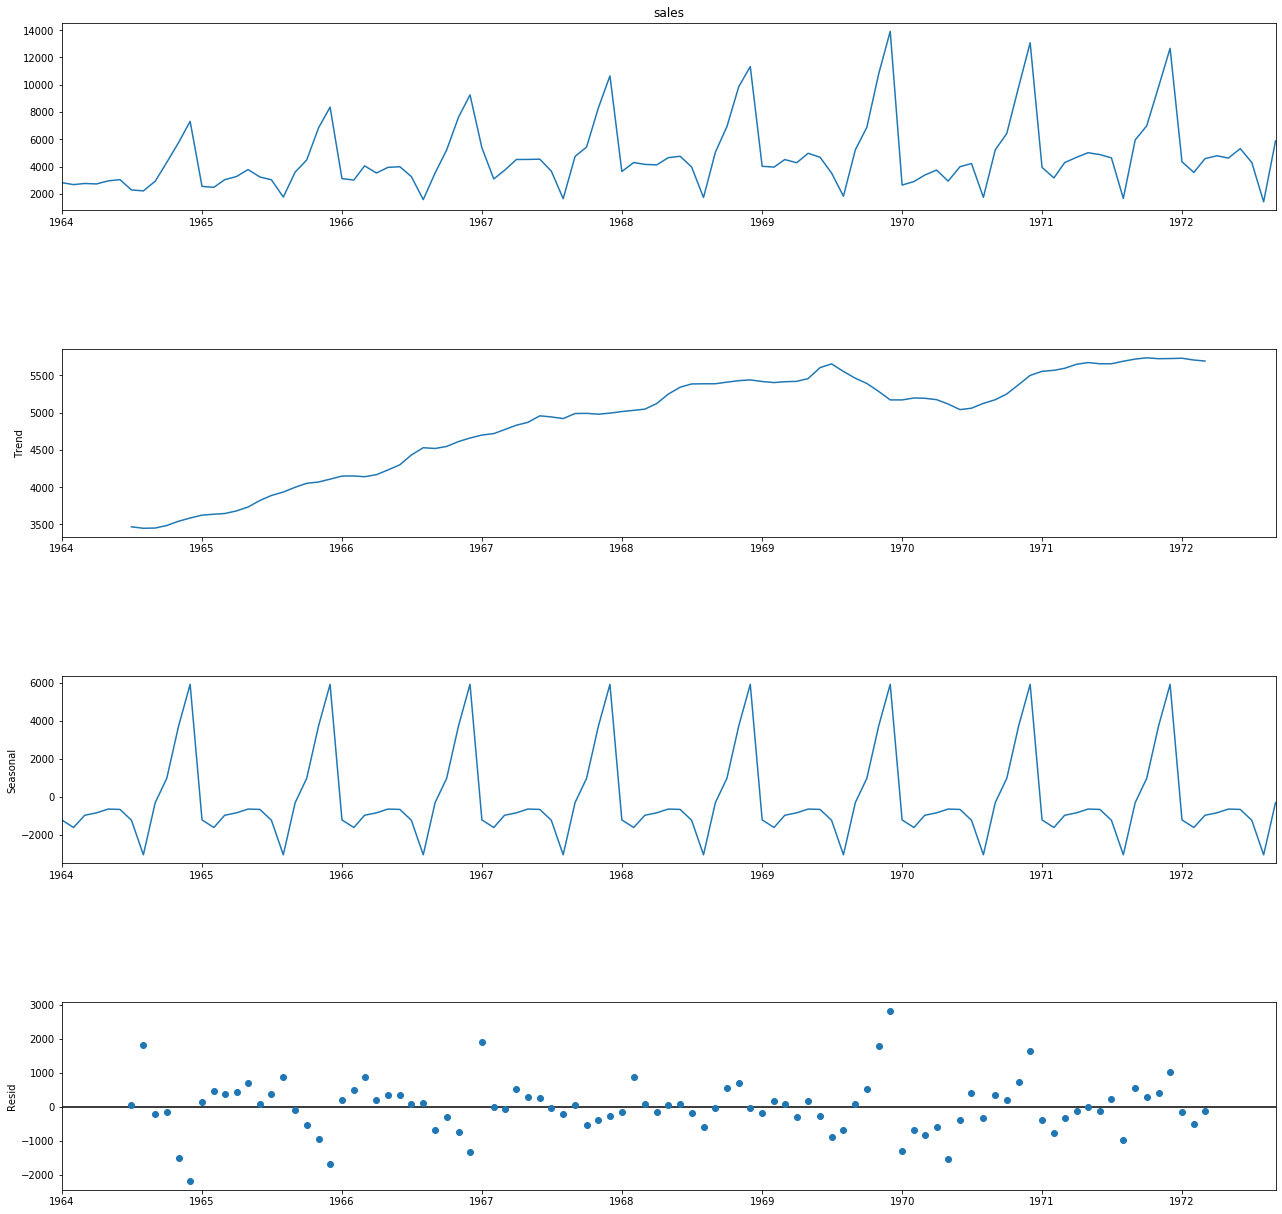

In [7]:
#Seasonal decomposing
from statsmodels.tsa.seasonal import seasonal_decompose
results=seasonal_decompose(df['sales'])
results.plot().set_size_inches(20,20);

- Statistical models such as ARIMA and SARIMAX could be applied to only stationary data.    
- In order to check whether data is stationary or not, Agumentated Dicky Fuller test could be used.   
- If data is not stationary differencing technique need to be applied.

#### Agumented Dicky Fuller test
- adfuller test gives some statistical data with p- value.
- If p-value is less than the critical value (0.05) then null hypothesis will be rjected otherwise can not be rejected.

    Hypothesis Definition:
- H0 : Null Hypothesis states there is the presence of a unit root. In other words, Stationarity doesn't exists.
- HA : Alternate Hypothesis states there is no unit root. In other words, Stationarity exists. 

In [260]:
#Agumented Dicky Fuller test
from statsmodels.tsa.api import adfuller,ARIMA,SARIMAX
def adf_test(df):
    data=adfuller(df)[:-1]
    Test_stats,p_value,lags,obs,critical_values=data
    print('Test_stats:',Test_stats,
          '\np-value: ',p_value,
          '\nlags: ',lags,
          '\nobs: ',obs,
          '\ncritical_values: ',critical_values)
adf_test(df)

Test_stats: -1.8335930563276195 
p-value:  0.3639157716602467 
lags:  11 
obs:  93 
critical_values:  {'1%': -3.502704609582561, '5%': -2.8931578098779522, '10%': -2.583636712914788}


- p-value is greater than 0.05 so data is not stationary

- Data contains seasonality and non-stationarity. 
- Need to select auto correlation, differencing and moving average values.
- Using auto_arima library p,d,q and P,D,Q values could be iterated to get best values based on minimum AIC value.

In [264]:
#auto_arima to find out the p,d and q values.
from pmdarima import auto_arima
arima=auto_arima(train['sales'],trace=True,start_p=2,d=None,start_q=2,max_p=5,max_d=2,max_q=5,
                start_P=1,D=None,start_Q=1,max_P=2,max_D=2,max_Q=2,max_order=5,m=12)
arima.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=1113.080, Time=2.14 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1103.707, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=1106.797, Time=0.55 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=1106.812, Time=0.12 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1111.115, Time=0.01 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=1105.614, Time=0.08 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=1105.621, Time=0.08 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=1107.614, Time=0.13 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=1104.799, Time=0.03 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=1104.814, Time=0.02 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=1106.872, Time=0.06 sec

Best model:  ARIMA(0,0,0)(0,1,0)[12] intercept
Total fit time: 3.264 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                 
================================================================================
Dep. Variable:                        y   No. Observations:                   80
Model:             SARIMAX(0, 1, 0, 12)   Log Likelihood                -549.854
Date:                  Mon, 07 Mar 2022   AIC                           1103.707
Time:                          18:13:06   BIC                           1108.146
Sample:                               0   HQIC                          1105.466
                                   - 80                                         
Covariance Type:                    opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    302.8088     95.949      3.156      0.002     114.752     490.865
sigma2       6.18e+05   8.05e+04      7.677      0.000     4.6e+05    7.76e+05
===================================================================================
Ljung-Box (L1) (Q):                   1.90   Jarque-Bera (JB):                 6.98
Prob(Q):                              0.17   Prob(JB):                         0.03
Heteroskedasticity (H):               5.22   Skew:                            -0.21
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [95]:
#Splitting data into train and test 
train=df[:80]
test=df[70:]

In [267]:
#Building SARIMAX model based on the selected values.
model=ARIMA(train['sales'],order=(0,0,0),seasonal_order=(0,1,0,12))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  sales   No. Observations:                   80
Model:             ARIMA(0, 1, 0, 12)   Log Likelihood                -554.557
Date:                Mon, 07 Mar 2022   AIC                           1111.115
Time:                        18:13:53   BIC                           1113.334
Sample:                    01-01-1964   HQIC                          1111.994
                         - 08-01-1970                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       7.08e+05   1.01e+05      6.996      0.000     5.1e+05    9.06e+05
===================================================================================
Ljung-Box (L1) (Q):                   1.90   Jarque-Bera (JB):                 6.98
Prob(Q):                              0.17   Prob(JB):                         0.03
Heteroskedasticity (H):               2.81   Skew:                            -0.21
Prob(H) (two-sided):                  0.02   Kurtosis:                         4.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

- All the features in the fitted equation has p-value less than the critical values

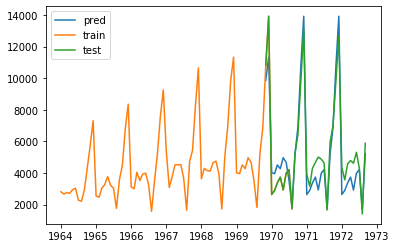

In [269]:
#Plotting train, test and predicted data
pred=model.predict(start=70,end=104)
plt.plot(pred)
plt.plot(train)
plt.plot(test)
plt.legend(['pred','train','test'])

- We can obsevre there is similarity in the pattern of test and predicted values.

In [271]:
#Comparison between test and predicted.
df_pred=pd.concat([pred,test],axis=1)
df_pred.head(10)

,predicted_mean,sales
1969-11-01,9858.0,10803.0
1969-12-01,11331.0,13916.0
1970-01-01,4016.0,2639.0
1970-02-01,3957.0,2899.0
1970-03-01,4510.0,3370.0
1970-04-01,4276.0,3740.0
1970-05-01,4968.0,2927.0
1970-06-01,4677.0,3986.0
1970-07-01,3523.0,4217.0
1970-08-01,1821.0,1738.0


#### Building deeplearning model.

In [272]:
#importing libraries.
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense
from keras.preprocessing.sequence import TimeseriesGenerator

- For deeplearning model dependent and independent data need to be supplied as input.
- Previous 12 values will be used as independent features for predicting next (13th as dependent) values.
- To generate these sequence TimeseriesGenerator module could be used.

In [276]:
#TimeseriesGenerator
train_g=TimeseriesGenerator(train.sales,train.sales,length=12,batch_size=1)
print('Independent: ',train_g[0][0])
print('Dependent: ',train_g[0][1])
print('Independent: ',train_g[1][0])
print('Dependent: ',train_g[1][1])

Independent:  [[2815. 2672. 2755. 2721. 2946. 3036. 2282. 2212. 2922. 4301. 5764. 7312.]]
Dependent:  [2541.]
Independent:  [[2672. 2755. 2721. 2946. 3036. 2282. 2212. 2922. 4301. 5764. 7312. 2541.]]
Dependent:  [2475.]


In [278]:
#Model definition
input_shape=(12,1)
model=Sequential()
model.add(LSTM(100,activation='relu',input_shape=input_shape))
model.add(Dense(1))

#Model compilation
model.compile(optimizer='adam',loss='mse')

#Model Summary
model.build(input_shape)
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 100)               40800     
                                                                 
 dense_15 (Dense)            (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [279]:
#Fitting model with generated sequence data.
model.fit(train_g,epochs=100)

Epoch 1/100
68/68 [==============================] - 3s 5ms/step - loss: 20773238.0000
Epoch 2/100
68/68 [==============================] - 0s 4ms/step - loss: 5753161.0000
Epoch 3/100
68/68 [==============================] - 0s 5ms/step - loss: 4224130.5000
Epoch 4/100
68/68 [==============================] - 0s 5ms/step - loss: 5264554.0000
Epoch 5/100
68/68 [==============================] - 0s 6ms/step - loss: 4153415.5000
Epoch 6/100
68/68 [==============================] - 0s 5ms/step - loss: 5252286.5000
Epoch 7/100
68/68 [==============================] - 0s 6ms/step - loss: 2573749.5000
Epoch 8/100
68/68 [==============================] - 0s 5ms/step - loss: 3600640.5000
Epoch 9/100
68/68 [==============================] - 0s 4ms/step - loss: 3282431.2500
Epoch 10/100
68/68 [==============================] - 0s 5ms/step - loss: 3217573.7500
Epoch 11/100
68/68 [==============================] - 0s 5ms/step - loss: 2252660.5000
Epoch 12/100
68/68 [==============================]

68/68 [==============================] - 0s 4ms/step - loss: 596652.6875
Epoch 96/100
68/68 [==============================] - 0s 5ms/step - loss: 1024424.5625
Epoch 97/100
68/68 [==============================] - 0s 4ms/step - loss: 635437.0000
Epoch 98/100
68/68 [==============================] - 0s 4ms/step - loss: 725367.0625
Epoch 99/100
68/68 [==============================] - 0s 5ms/step - loss: 728140.5000
Epoch 100/100
68/68 [==============================] - 0s 6ms/step - loss: 613126.4375


In [280]:
#Converting test data into sequense
test_g=TimeseriesGenerator(test.sales,test.sales,length=12,batch_size=1)

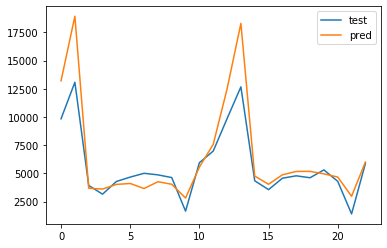

In [281]:
#Prediction 
pred=model.predict(test_g)
plt.plot(test['sales'][12:].reset_index(drop=True))
plt.plot(pred)
plt.legend(['test','pred'])

In [284]:
#Scaling 
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
train_sc=scaler.fit(train)
train_sc=scaler.transform(train)
test_sc=scaler.transform(test)

In [288]:
#TimeseriesGenerator
from keras.preprocessing.sequence import TimeseriesGenerator
train_g=TimeseriesGenerator(train_sc,train_sc,length=12,batch_size=1)
print('Independent: ',train_g[0][0])
print('Dependent: ',train_g[0][1])
print('Independent: ',train_g[1][0])
print('Dependent: ',train_g[1][1])

Independent:  [[[-0.70335456]
  [-0.76354769]
  [-0.72861042]
  [-0.74292207]
  [-0.64821261]
  [-0.61032882]
  [-0.92771076]
  [-0.95717592]
  [-0.65831495]
  [-0.07785118]
  [ 0.53797079]
  [ 1.1895719 ]]]
Dependent:  [[-0.81868964]]
Independent:  [[[-0.76354769]
  [-0.72861042]
  [-0.74292207]
  [-0.64821261]
  [-0.61032882]
  [-0.92771076]
  [-0.95717592]
  [-0.65831495]
  [-0.07785118]
  [ 0.53797079]
  [ 1.1895719 ]
  [-0.81868964]]]
Dependent:  [[-0.84647108]]


In [302]:
#Model building
input_shape=(12,1)
model=Sequential()
model.add(LSTM(500,activation='relu',input_shape=input_shape))
model.add(Dense(1))

#Model compilation
model.compile(optimizer='adam',loss='mse')

#Model summary
model.build(input_shape)
model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_20 (LSTM)              (None, 500)               1004000   
                                                                 
 dense_19 (Dense)            (None, 1)                 501       
                                                                 
Total params: 1,004,501
Trainable params: 1,004,501
Non-trainable params: 0
_________________________________________________________________


In [303]:
model.fit(train_g,epochs=200)

Epoch 1/200
68/68 [==============================] - 6s 52ms/step - loss: 1.1192
Epoch 2/200
68/68 [==============================] - 4s 53ms/step - loss: 1.0097
Epoch 3/200
68/68 [==============================] - 4s 53ms/step - loss: 0.9720
Epoch 4/200
68/68 [==============================] - 4s 53ms/step - loss: 1.0123
Epoch 5/200
68/68 [==============================] - 4s 53ms/step - loss: 10.0046
Epoch 6/200
68/68 [==============================] - 4s 54ms/step - loss: 0.7415
Epoch 7/200
68/68 [==============================] - 4s 54ms/step - loss: 0.5962
Epoch 8/200
68/68 [==============================] - 4s 54ms/step - loss: 0.2962
Epoch 9/200
68/68 [==============================] - 4s 54ms/step - loss: 0.4427
Epoch 10/200
68/68 [==============================] - 4s 55ms/step - loss: 0.4158
Epoch 11/200
68/68 [==============================] - 4s 55ms/step - loss: 0.2276
Epoch 12/200
68/68 [==============================] - 4s 54ms/step - loss: 0.2215
Epoch 13/200
68/68 [====

Epoch 101/200
68/68 [==============================] - 4s 54ms/step - loss: 0.0438
Epoch 102/200
68/68 [==============================] - 4s 54ms/step - loss: 0.1136
Epoch 103/200
68/68 [==============================] - 4s 54ms/step - loss: 0.0441
Epoch 104/200
68/68 [==============================] - 4s 54ms/step - loss: 0.0388
Epoch 105/200
68/68 [==============================] - 4s 54ms/step - loss: 0.0400
Epoch 106/200
68/68 [==============================] - 4s 55ms/step - loss: 0.0377
Epoch 107/200
68/68 [==============================] - 4s 54ms/step - loss: 0.0411
Epoch 108/200
68/68 [==============================] - 4s 54ms/step - loss: 0.0344
Epoch 109/200
68/68 [==============================] - 4s 54ms/step - loss: 0.0352
Epoch 110/200
68/68 [==============================] - 4s 54ms/step - loss: 0.0510
Epoch 111/200
68/68 [==============================] - 4s 56ms/step - loss: 0.0307
Epoch 112/200
68/68 [==============================] - 4s 56ms/step - loss: 0.0331
Epoc

68/68 [==============================] - 4s 54ms/step - loss: 0.0113
Epoch 200/200
68/68 [==============================] - 4s 54ms/step - loss: 0.0107


In [304]:
#test data sequence
test_sc_g=TimeseriesGenerator(test_sc,test_sc,length=12,batch_size=1)
test_sc_g[0]

(array([[[ 2.65904182],
         [ 3.96939985],
         [-0.77743841],
         [-0.66799636],
         [-0.46973789],
         [-0.31399344],
         [-0.6562103 ],
         [-0.21044443],
         [-0.11320938],
         [-1.15669719],
         [ 0.30940529],
         [ 0.81578522]]]), array([[2.25452719]]))

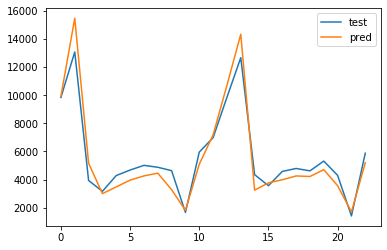

In [305]:
#Prediction and inverse_transform to get sales value.
pred=scaler.inverse_transform(model.predict(test_sc_g))
plt.plot(test[12:].reset_index(drop=True))
plt.plot(pred)
plt.legend(['test','pred'])